In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations

# Define file paths for the datasets I am working with
file_paths = [
    'Covid-19-R.csv',         # File containing R-values (infection rate)
    'Covid-19-aggregated.csv' # File containing aggregated COVID-19 case data
]

# Define a function to load and process the data
def load_and_process(file_path):
    """
    This function loads a CSV file, processes missing values, selects relevant columns,
    filters data based on a specific date range (May 2020 - May 2022), 
    and extracts time-related features for further analysis.
    """

    # Load the dataset into a Pandas DataFrame
    data = pd.read_csv(file_path)

    # Print the first few rows to inspect the data structure and ensure it loaded correctly
    print(f"Loaded file: {file_path}")
    print(data.head())

    # Handle potential column name inconsistencies across datasets
    # If 'cases' column is missing but 'Number of cases' exists, rename it to 'cases'
    if 'cases' not in data.columns and 'Number of cases' in data.columns:
        data.rename(columns={'Number of cases': 'cases'}, inplace=True)

    # If the dataset contains an 'R' column, rename it to 'cases' to standardize the column names
    if 'R' in data.columns:
        data.rename(columns={'R': 'cases'}, inplace=True)

    # Convert the "Time Stamp" column to datetime format to facilitate time-based filtering
    data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], errors='coerce')

    # Define the time period I am interested in
    start_date = '2020-03-16'
    end_date = '2020-05-09'

    # Filter the data to include only rows within this date range
    filtered_data = data[(data['Time Stamp'] >= start_date) & (data['Time Stamp'] <= end_date)]

    # Handle missing values using forward fill (ffill) to propagate previous valid values
    filtered_data = filtered_data.ffill()

    # Retain only the necessary columns for analysis
    if 'cases' in filtered_data.columns:
        filtered_data = filtered_data[['Time Stamp', 'cases']]  # Keeping only timestamp and cases
    else:
        # Print a warning if the expected columns are missing in the dataset
        print(f"Warning: Expected columns not found in {file_path}")

    # Feature Engineering: Extract key time-related features from 'Time Stamp'
    filtered_data['year'] = filtered_data['Time Stamp'].dt.year        # Extract the year
    filtered_data['month'] = filtered_data['Time Stamp'].dt.month      # Extract the month
    filtered_data['day'] = filtered_data['Time Stamp'].dt.day          # Extract the day
    filtered_data['week_day'] = filtered_data['Time Stamp'].dt.weekday # Extract the weekday (0=Monday, 6=Sunday)

    # Create an 'infection_rate' feature (in this case, it's just the same as 'cases' for now)
    # This can later be modified to represent the actual infection rate if needed
    filtered_data['infection_rate'] = filtered_data['cases']

    return filtered_data  # Return the cleaned and processed DataFrame

# Initialize an empty list to store processed data from each file
processed_data = []

# Loop through each file path and process the data
for file_path in file_paths:
    data = load_and_process(file_path)  # Apply the processing function to each file
    processed_data.append(data)         # Append the processed DataFrame to the list

# Combine all processed datasets into a single DataFrame
combined_data = pd.concat(processed_data, ignore_index=True)

# Print the first few rows of the final processed dataset to verify the results
print("Combined processed data:")
print(combined_data.head())


Loaded file: Covid-19-R.csv
   Unnamed: 0  Time Stamp         Region   Latitude   Longitude          R
0           0  03-16-2020       Alhambra  34.093042 -118.127060   4.750016
1           1  03-16-2020        Arcadia  34.136208 -118.040150   0.000000
2           2  03-16-2020  Beverly Hills  34.069650 -118.396306   0.000000
3           3  03-16-2020  Boyle Heights  34.043689 -118.209768   1.000008
4           4  03-16-2020         Carson  33.832204 -118.251755  16.000019
Loaded file: Covid-19-aggregated.csv
   Time Stamp         Region   Latitude   Longitude  Number of cases
0  03-16-2020       Alhambra  34.093042 -118.127060                2
1  03-16-2020        Arcadia  34.136208 -118.040150                1
2  03-16-2020  Beverly Hills  34.069650 -118.396306                1
3  03-16-2020  Boyle Heights  34.043689 -118.209768                5
4  03-16-2020         Carson  33.832204 -118.251755                1
Combined processed data:
  Time Stamp      cases  year  month  day  wee

In [2]:
# Ensure that the 'Time Stamp' column has not been mistakenly removed or altered
if 'Time Stamp' in combined_data.columns:
    # Convert the 'Time Stamp' column to a datetime format to facilitate time-based operations
    combined_data['Time Stamp'] = pd.to_datetime(combined_data['Time Stamp'], errors='coerce')
    
# If the DataFrame is already indexed by 'Time Stamp', print a confirmation message
elif isinstance(combined_data.index, pd.DatetimeIndex):
    print("Time Stamp is already set as the index.")

# Ensure that the data is sorted in chronological order for accurate time series modelling
combined_data = combined_data.sort_index()

# Output the final shape of the processed DataFrame to verify data integrity
print("Final combined_data shape:", combined_data.shape)

# Display the first few rows of the final dataset to confirm everything is correctly structured
print("Final data preview:\n", combined_data.head())


Final combined_data shape: (19041, 7)
Final data preview:
   Time Stamp      cases  year  month  day  week_day  infection_rate
0 2020-03-16   4.750016  2020      3   16         0        4.750016
1 2020-03-16   0.000000  2020      3   16         0        0.000000
2 2020-03-16   0.000000  2020      3   16         0        0.000000
3 2020-03-16   1.000008  2020      3   16         0        1.000008
4 2020-03-16  16.000019  2020      3   16         0       16.000019


TensorFlow is using GPU: []
Step 0 - Checking combined_data shape: (19041, 7)
Step 1 - Target column exists in combined_data.
Step 2 - Checking train and test dataset sizes:
Train dataset shape: (15232, 7)
Test dataset shape: (3809, 7)
Step 3 - Checking X_train and y_train:
X_train shape: (15232, 5)
y_train shape: (15232,)
X_test shape: (3809, 5)
y_test shape: (3809,)
Step 4 - Starting LSTM training...
Epoch 1/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 7.9588
Epoch 2/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0017
Epoch 3/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0012
Epoch 4/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0014
Epoch 5/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0014
Epoch 6/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0018
Epoch 7/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0041
Epoch 8/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0045
Epoch 9/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss

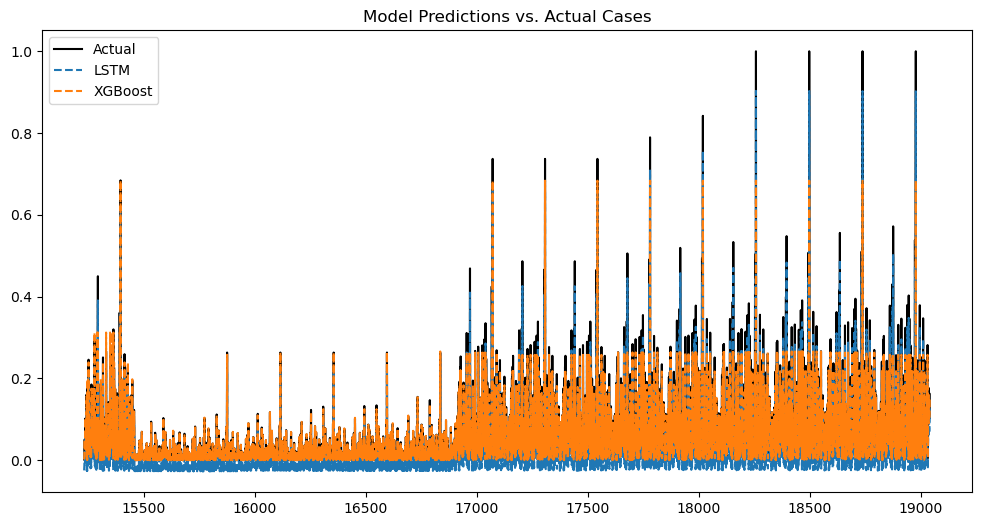

Step 7 - Plotting complete.


In [4]:
# Import necessary libraries for data processing, visualisation, and machine learning
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# **Ensure TensorFlow only uses the CPU**
# Setting this environment variable disables GPU usage, forcing computations onto the CPU.
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# **Verify that TensorFlow is correctly restricted to CPU**
import tensorflow as tf
print("TensorFlow is using GPU:", tf.config.list_physical_devices('GPU'))  # Should return an empty list if successful

# **Data Preprocessing**
# Ensure that 'combined_data' has been defined before proceeding
if 'combined_data' not in locals():
    print("Error: `combined_data` is not defined.")
else:
    print("Step 0 - Checking combined_data shape:", combined_data.shape)

# **Normalising `cases` and `infection_rate` columns**
# Scaling values between 0 and 1 ensures that models, especially neural networks, train more effectively.
scaler = MinMaxScaler()
combined_data[['cases', 'infection_rate']] = scaler.fit_transform(combined_data[['cases', 'infection_rate']])

# **Define features and target variable**
features = ['year', 'month', 'day', 'week_day', 'infection_rate']  # ✅ Added 'infection_rate' as a new feature
target = 'cases'

# **Ensure the target variable exists before proceeding**
if target not in combined_data.columns:
    print(f"Error: Target column '{target}' is missing from combined_data.")
else:
    print("Step 1 - Target column exists in combined_data.")

# **Split the dataset into training and testing sets**
# Keeping 'shuffle=False' ensures that the time-series order is preserved.
train, test = train_test_split(combined_data, test_size=0.2, shuffle=False)

# **Check dataset sizes**
print("Step 2 - Checking train and test dataset sizes:")
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

# **Separate features and target variable for both training and testing sets**
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# **Confirm that `X_train` and `y_train` are correctly defined**
print("Step 3 - Checking X_train and y_train:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# **Ensure that the LSTM model input is in the correct shape**
# Reshaping is required because LSTM expects a 3D input (samples, time steps, features).
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# **Define and build an improved LSTM model**
lstm_model = Sequential([
    Input(shape=(1, X_train.shape[1])),  # Input layer with correct shape
    LSTM(100, activation='relu', return_sequences=True),  # ✅ Added another LSTM layer for better feature extraction
    LSTM(50, activation='relu'),  # Second LSTM layer
    Dense(1)  # Output layer predicting the number of cases
])
lstm_model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss function

# **Train the LSTM model**
print("Step 4 - Starting LSTM training...")
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)  # ✅ Increased epochs to 20
print("LSTM training complete.")

# **Train the XGBoost model**
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
print("Step 5 - Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("XGBoost training complete.")

# **Generate model predictions**
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()  # Predictions from LSTM
y_pred_xgb = xgb_model.predict(X_test)  # Predictions from XGBoost

# **Function to evaluate and compare models**
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")

# **Evaluate both models**
print("Step 6 - Evaluating models...")
evaluate(y_test, y_pred_lstm, "LSTM")
evaluate(y_test, y_pred_xgb, "XGBoost")

# **Visualise predictions vs actual data**
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='black')  # Actual case numbers
plt.plot(test.index, y_pred_lstm, label='LSTM', linestyle='dashed')  # LSTM predictions
plt.plot(test.index, y_pred_xgb, label='XGBoost', linestyle='dashed')  # XGBoost predictions
plt.legend()
plt.title('Model Predictions vs. Actual Cases')
plt.show()
print("Step 7 - Plotting complete.")


TensorFlow is using GPU: []
Step 0 - Checking combined_data shape: (19041, 7)
Step 1 - Target column exists in train.
Step 2 - Checking train/test dataset sizes:
X_train shape: (15232, 5)
y_train shape: (15232,)
X_test shape: (3809, 5)
y_test shape: (3809,)
Step 3 - Training LSTM...
Epoch 1/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 111.4410
Epoch 2/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3624
Epoch 3/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0618
Epoch 4/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0353
Epoch 5/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0184
Epoch 6/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0067
Epoch 7/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0109
Epoch 8/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0045
Epoch 9/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0050
Epoch 10/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0034
Epoch 11/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s

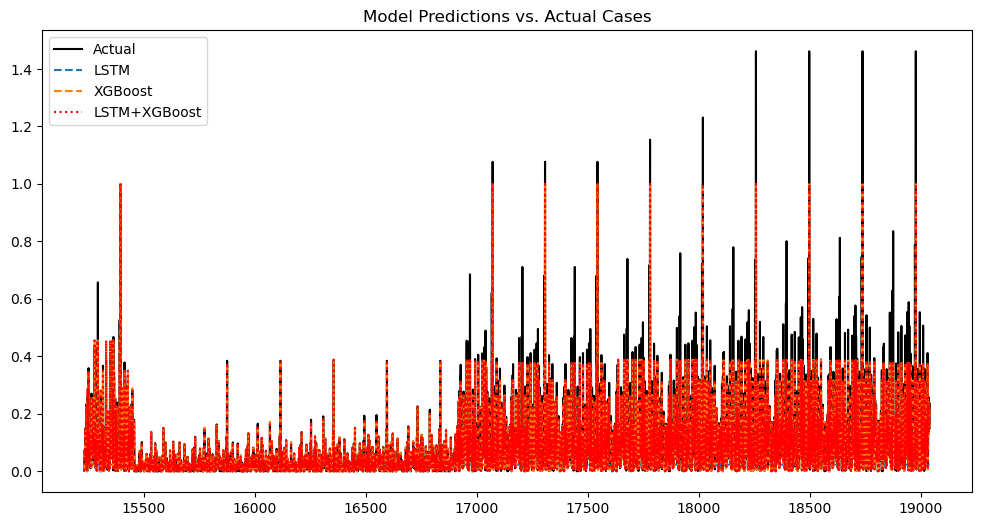

Step 8 - Plotting complete.


In [5]:
# Import necessary libraries for data processing, machine learning, and visualisation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# **Disable GPU to prevent environmental conflicts**
# Setting this environment variable ensures that TensorFlow does not attempt to use the GPU.
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# **Verify that TensorFlow is correctly restricted to CPU**
import tensorflow as tf
print("TensorFlow is using GPU:", tf.config.list_physical_devices('GPU'))  # Should return an empty list if GPU is disabled

# **Data Preprocessing**
# Ensure that 'combined_data' has been defined before proceeding
if 'combined_data' not in locals():
    print("Error: `combined_data` is not defined.")
else:
    print("Step 0 - Checking combined_data shape:", combined_data.shape)

# **Split dataset into training and testing sets**
# We disable shuffling to preserve the time-series order.
train, test = train_test_split(combined_data, test_size=0.2, shuffle=False)

# **Apply normalisation only to the training dataset**
# This prevents data leakage from the test set.
scaler = MinMaxScaler()
train[['cases', 'infection_rate']] = scaler.fit_transform(train[['cases', 'infection_rate']])
test[['cases', 'infection_rate']] = scaler.transform(test[['cases', 'infection_rate']])

# **Define features and target variable**
features = ['year', 'month', 'day', 'week_day', 'infection_rate']  # ✅ Incorporating 'infection_rate' as an additional feature
target = 'cases'

# **Ensure the target variable exists before proceeding**
if target not in train.columns:
    print(f"Error: Target column '{target}' is missing from train.")
else:
    print("Step 1 - Target column exists in train.")

# **Separate features and target variable for both training and testing sets**
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# **Confirm dataset sizes**
print("Step 2 - Checking train/test dataset sizes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# **Ensure that the LSTM model input is in the correct shape**
# Reshaping is required as LSTM expects a 3D input: (samples, time steps, features).
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# **Define and build an LSTM model with dropout layers**
lstm_model = Sequential([
    Input(shape=(1, X_train.shape[1])),  # Input layer with correct shape
    LSTM(100, activation='relu', return_sequences=True),  # First LSTM layer retaining sequences
    Dropout(0.2),  # ✅ Dropout to reduce overfitting
    LSTM(50, activation='relu'),  # Second LSTM layer
    Dropout(0.2),  # ✅ Another dropout layer for robustness
    Dense(1)  # Output layer predicting the number of cases
])
lstm_model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss function

# **Train the LSTM model**
print("Step 3 - Training LSTM...")
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)
print("LSTM training complete.")

# **Generate predictions using the trained LSTM model**
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# **Define and train the XGBoost model**
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
print("Step 4 - Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("XGBoost training complete.")

# **Generate predictions using the trained XGBoost model**
y_pred_xgb = xgb_model.predict(X_test)

# **Using LSTM as a feature extractor for XGBoost**
print("Step 5 - Extracting features from LSTM for XGBoost...")
X_train_lstm_features = lstm_model.predict(X_train_lstm)  # LSTM-generated features from training data
X_test_lstm_features = lstm_model.predict(X_test_lstm)  # LSTM-generated features from testing data

# **Combine original features with extracted LSTM features**
X_train_combined = np.hstack((X_train, X_train_lstm_features))
X_test_combined = np.hstack((X_test, X_test_lstm_features))

# **Train a new XGBoost model incorporating LSTM features**
xgb_lstm_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
print("Step 6 - Training LSTM+XGBoost...")
xgb_lstm_model.fit(X_train_combined, y_train)
print("LSTM+XGBoost training complete.")

# **Generate predictions using the combined LSTM+XGBoost model**
y_pred_xgb_lstm = xgb_lstm_model.predict(X_test_combined)

# **Function to evaluate and compare models**
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

# **Evaluate all models**
print("Step 7 - Evaluating models...")
evaluate(y_test, y_pred_lstm, "LSTM")
evaluate(y_test, y_pred_xgb, "XGBoost")
evaluate(y_test, y_pred_xgb_lstm, "LSTM+XGBoost")

# **Visualise predictions vs actual data**
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='black')  # Actual case numbers
plt.plot(test.index, y_pred_lstm, label='LSTM', linestyle='dashed')  # LSTM predictions
plt.plot(test.index, y_pred_xgb, label='XGBoost', linestyle='dashed')  # XGBoost predictions
plt.plot(test.index, y_pred_xgb_lstm, label='LSTM+XGBoost', linestyle='dotted', color='red')  # Hybrid predictions
plt.legend()
plt.title('Model Predictions vs. Actual Cases')
plt.show()

print("Step 8 - Plotting complete.")
